In [1]:
#import data manipulation library 
import pandas as pd
import numpy as np
#import data visualization library
import seaborn as sns
import matplotlib.pyplot as plt
#import data filter warining libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data using URL from GITHUB
url='https://raw.githubusercontent.com/kanishka1478/SUPPLYCHAIN/refs/heads/main/SCM.csv'
df=pd.read_csv(url)
df.sample(frac=1)#data shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
17580,WH_117580,EID_67580,Rural,Large,North,Zone 5,6,0,3,5120,...,1,132,34.0,NaN,4,1,B+,3,25,5067
6970,WH_106970,EID_56970,Rural,Small,West,Zone 6,4,0,4,5851,...,1,167,35.0,1999.0,15,0,B+,5,9,18108
2134,WH_102134,EID_52134,Rural,Small,West,Zone 6,5,0,3,4974,...,0,55,28.0,2012.0,16,0,B,6,8,19145
6214,WH_106214,EID_56214,Urban,Small,West,Zone 6,1,0,4,4824,...,1,246,29.0,NaN,28,0,B+,3,9,35100
15804,WH_115804,EID_65804,Rural,Large,North,Zone 6,7,3,2,4499,...,0,223,25.0,NaN,20,1,A+,5,6,26118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,WH_100199,EID_50199,Urban,Mid,North,Zone 3,6,1,4,4723,...,1,161,31.0,2014.0,10,1,B,4,19,12129
16101,WH_116101,EID_66101,Rural,Small,South,Zone 1,1,4,4,3482,...,0,250,24.0,NaN,24,1,A+,4,21,31108
19374,WH_119374,EID_69374,Rural,Large,West,Zone 5,5,3,4,5816,...,1,133,29.0,NaN,17,0,A,3,14,22094
1474,WH_101474,EID_51474,Rural,Small,North,Zone 6,0,0,4,4225,...,0,107,21.0,NaN,4,0,B+,1,13,5085


In [3]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [18]:
#checking data description:univariate analysis
'''
the following data is found to be the non normal distributed data ,since mean!= median
'''


df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


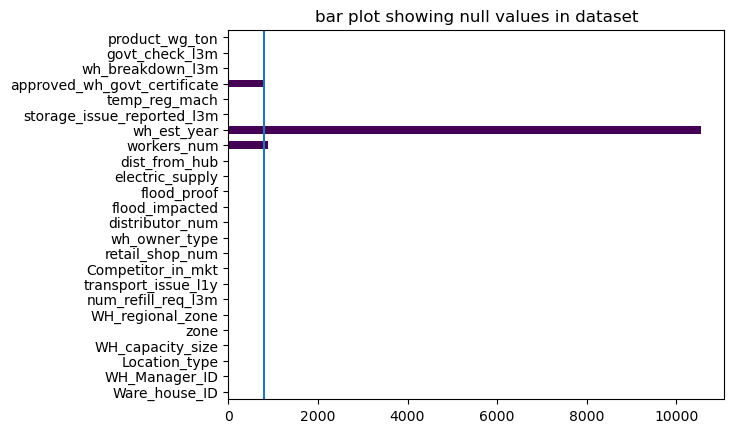

In [26]:
#checking null values in dataset
df.isnull().sum().plot(kind='barh',cmap='viridis')
plt.title('bar plot showing null values in dataset')
plt.axvline(805)
plt.show()

In [28]:
#calculating missing value percentage:
(df['approved_wh_govt_certificate'].isnull().sum()/len(df['approved_wh_govt_certificate']))*100

3.6343115124153504

In [34]:
(df['wh_est_year'].isnull().sum()/len(df['wh_est_year']))*100

47.60722347629797

In [36]:
df['wh_est_year'].value_counts().head(10)

wh_est_year
2000.0    495
2002.0    479
2006.0    475
2014.0    474
2007.0    465
2004.0    458
2016.0    454
2001.0    450
1998.0    449
2018.0    448
Name: count, dtype: int64

In [38]:
df['wh_est_year'].quantile(0.75),df['wh_est_year'].quantile(0.25)

(2016.0, 2003.0)

In [40]:
df['wh_est_year'].median()


2009.0

In [42]:
df['wh_est_year'].mean()

2009.4012063765617

In [48]:
#impute the missing values column
df['wh_est_year'].fillna(2009,inplace =True)

In [50]:

df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode(),inplace=True)